In [1]:
import pandas as pd
from pathlib import Path

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.


['sample_submission.csv', 'test.csv.zip', 'train.csv.zip', 'labels.csv.zip', 'train.csv', 'test.csv', 'labels.csv', 'description.md', 'GCP-Coupons-Instructions.rtf', 'sample_submission.csv.zip', 'new-york-city-taxi-fare-prediction']


In [3]:
taxidata = pd.read_csv("../input/train.csv",nrows = 20_000_000)


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
taxidata.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [6]:
taxidata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000000 entries, 0 to 19999999
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   fare_amount        float64
 2   pickup_datetime    object 
 3   pickup_longitude   float64
 4   pickup_latitude    float64
 5   dropoff_longitude  float64
 6   dropoff_latitude   float64
 7   passenger_count    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 1.2+ GB


In [7]:
taxidata.describe()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+07,2.000000e+07,2.000000e+07,1.999986e+07,1.999986e+07,2.000000e+07
mean,1.134298e+01,-7.251140e+01,3.992070e+01,-7.251060e+01,3.991950e+01,1.685312e+00
std,1.689916e+01,1.298955e+01,9.388927e+00,1.290617e+01,9.570037e+00,1.321177e+00
min,-1.077500e+02,-3.439245e+03,-3.492264e+03,-3.442025e+03,-3.493652e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073491e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075315e+01,1.000000e+00
75%,1.250000e+01,-7.396709e+01,4.076712e+01,-7.396368e+01,4.076809e+01,2.000000e+00
max,6.155086e+04,3.457626e+03,3.406008e+03,3.457622e+03,3.400392e+03,2.080000e+02


In [8]:
print(taxidata.isnull().sum())


key                    0
fare_amount            0
pickup_datetime        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude    139
dropoff_latitude     139
passenger_count        0
dtype: int64


In [9]:
taxidata = taxidata.dropna()


In [10]:
len(taxidata)


19999861

In [11]:
taxidata['lat_diff'] = (taxidata['dropoff_latitude']-taxidata['pickup_latitude']).abs()
taxidata['lon_diff'] = (taxidata['dropoff_longitude']-taxidata['pickup_longitude']).abs()


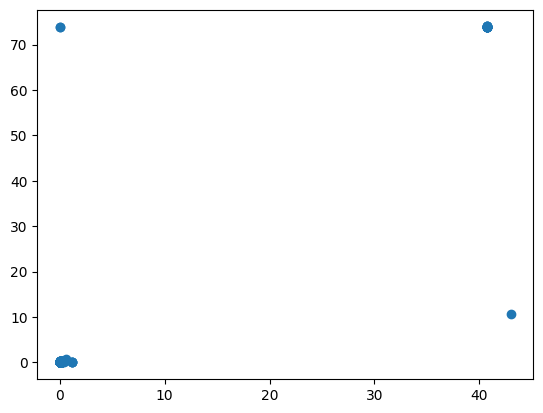

In [12]:
#sum((taxidata['lon_diff']>5) & (taxidata['lat_diff']>5))
plt.scatter(taxidata['lat_diff'][10000:20000],taxidata['lon_diff'][10000:20000])


In [13]:
taxidata = taxidata[(taxidata['lat_diff']  5.0) & (taxidata['lon_diff']  5.0)]


SyntaxError: invalid syntax. Perhaps you forgot a comma? (1344501276.py, line 1)

(array([  347.,     0.,     0., 68919.,     0.,     0., 14902.,     0.,
            0.,     0.,  4392.,     0.,     0.,  2134.,     0.,     0.,
         7163.,     0.,     0.,  2143.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. , 3.3, 3.6,
        3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. ]),
 <BarContainer object of 20 artists>)

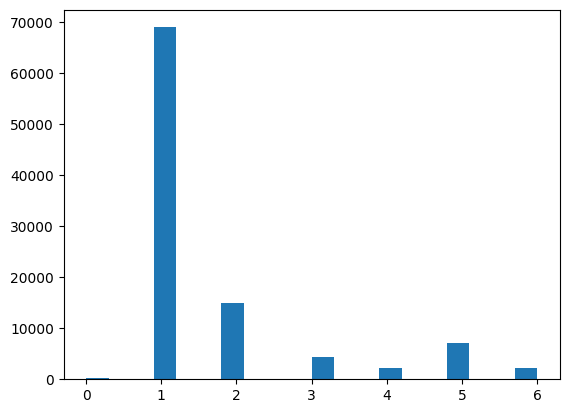

In [14]:
plt.hist(taxidata['passenger_count'][100000:200000],bins=20)


In [15]:
sum(taxidata['passenger_count']>9)


19

In [16]:
print(len(taxidata))
taxidata = taxidata[taxidata['passenger_count']10]
print(len(taxidata))


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3685659585.py, line 2)

In [17]:
sum(taxidata['fare_amount']>3000)


1

In [18]:
taxidata = taxidata[taxidata['fare_amount']1000]


SyntaxError: invalid syntax. Perhaps you forgot a comma? (2379303319.py, line 1)

In [19]:
taxidata_X = taxidata[['lat_diff','lon_diff','passenger_count']]
taxidata_y = taxidata['fare_amount']


In [20]:
from sklearn.model_selection import train_test_split


In [21]:
X_train, X_test, y_train, y_test = train_test_split(taxidata_X, taxidata_y, test_size=0.4)


In [22]:
from sklearn.linear_model import LinearRegression


In [23]:
lm = LinearRegression()


In [24]:
lm.fit(X_train,y_train)


LinearRegression()

In [25]:
lm.intercept_


11.189778955350118

In [26]:
lm.coef_


array([0.00020081, 0.00854328, 0.09341437])

In [27]:
test_pred = lm.predict(X_test)


/tmp/ipykernel_8/1039294875.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-test_pred)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fare_amount', ylabel='Density'>

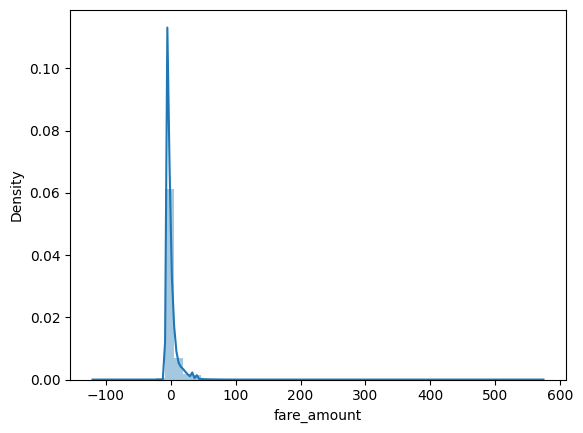

In [28]:
sns.distplot(y_test-test_pred)


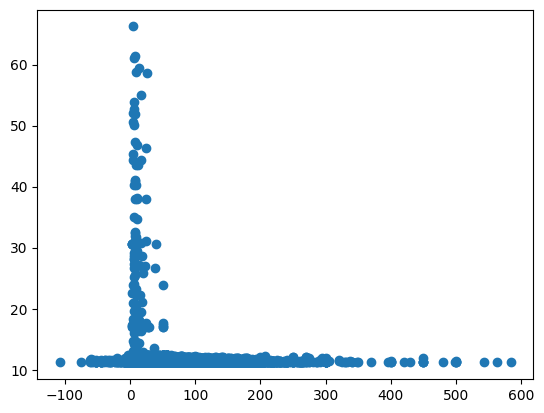

In [29]:
plt.scatter(y_test,test_pred)


In [30]:
from sklearn import metrics


In [31]:
np.sqrt(metrics.mean_squared_error(y_test,test_pred))


9.765575963732688

In [32]:
taxifare_test = pd.read_csv("../input/test.csv")


In [33]:
taxifare_test['lat_diff'] = (taxifare_test['dropoff_latitude']-taxifare_test['pickup_latitude']).abs()
taxifare_test['lon_diff'] = (taxifare_test['dropoff_longitude']-taxifare_test['pickup_longitude']).abs()


In [34]:
test_X = taxifare_test[['lat_diff','lon_diff','passenger_count']]


In [35]:
predictions = lm.predict(test_X)


In [36]:
predictions.max()


12.297275042525733

In [37]:
submission = pd.DataFrame(
    {'key': taxifare_test.key, 'fare_amount': predictions},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)

print(os.listdir('.'))


['new-york-city-taxi-fare-prediction_pkkondamuri_nyc-taxi-fare-kpk_v2_C1.ipynb', 'submission.csv', 'new-york-city-taxi-fare-prediction']
